In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from gen_euler_estimator import EulerEstimator

In [5]:
def da_dt(t, state):
    return state['a'] + 1


def db_dt(t, state):
    return state['a'] + state['b']


def dc_dt(t, state):
    return 2 * state['b'] + 3 * t


derivatives = {
    'a': da_dt,
    'b': db_dt,
    'c': dc_dt
}

initial_state = {'a': -0.45, 'b': -0.05, 'c': 0}
euler = EulerEstimator(derivatives)
euler.calc_estimated_points((-0.4, initial_state), step_size=2, num_steps=3)

[(-0.4, {'a': -0.45, 'b': -0.05, 'c': 0}),
 (1.6, {'a': 0.6500000000000001, 'b': -1.05, 'c': -2.6000000000000005}),
 (3.6, {'a': 3.95, 'b': -1.8499999999999999, 'c': 2.8000000000000007}),
 (5.6,
  {'a': 13.850000000000001, 'b': 2.3500000000000014, 'c': 17.000000000000004})]

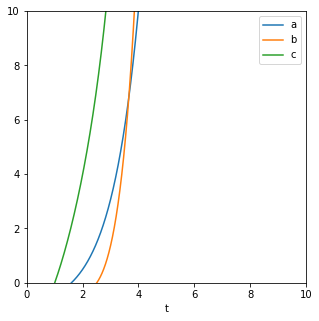

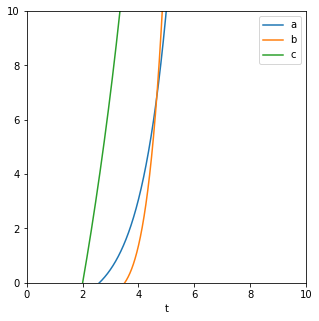

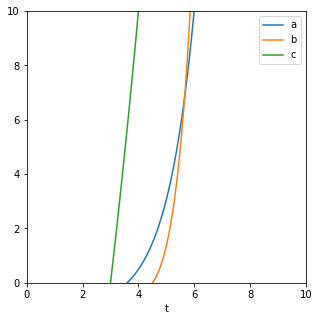

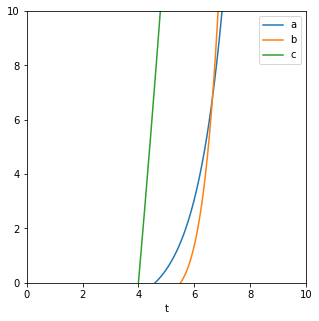

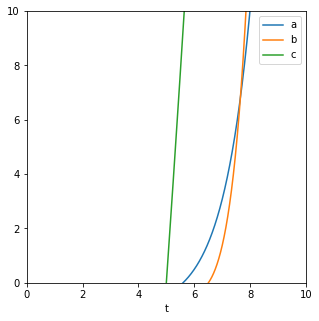

In [6]:
for i in range(1, 6):
    initial_point = (i, initial_state)
    euler = EulerEstimator(derivatives)


    estimated_points = euler.calc_estimated_points(initial_point, step_size=0.001, num_steps=10000)
    state_dict = {function: [point[1][function] for point in estimated_points] for function in euler.functions}
    t_list = [point[0] for point in estimated_points]
    df_dict = {'t': t_list}
    df_dict.update(state_dict)
    df = pd.DataFrame(df_dict)
    plot = df.plot(x="t", figsize=(5, 5))
    plt.xlim((0,10))
    plt.ylim((0,10))
    color_dict = {"a": "red", "b": "green", "c": "blue"}
    # for dimension in state_dict:
        # plot = df.plot(kind="scatter", x="t", y=dimension, ax=plot, color=color_dict[dimension])
